In [ ]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, BayesianRidge, ElasticNetCV

import matplotlib.pylab as plt

from sklearn.model_selection import cross_val_score
import sklearn.metrics

from dmba import regressionSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [ ]:
# Yes, here is the used Toyota Corolla sales dataset from the Netherlands

data_df = pd.read_csv('Big_Mart_Sales.csv')

In [ ]:
# Display the first 10 rows of the dataset

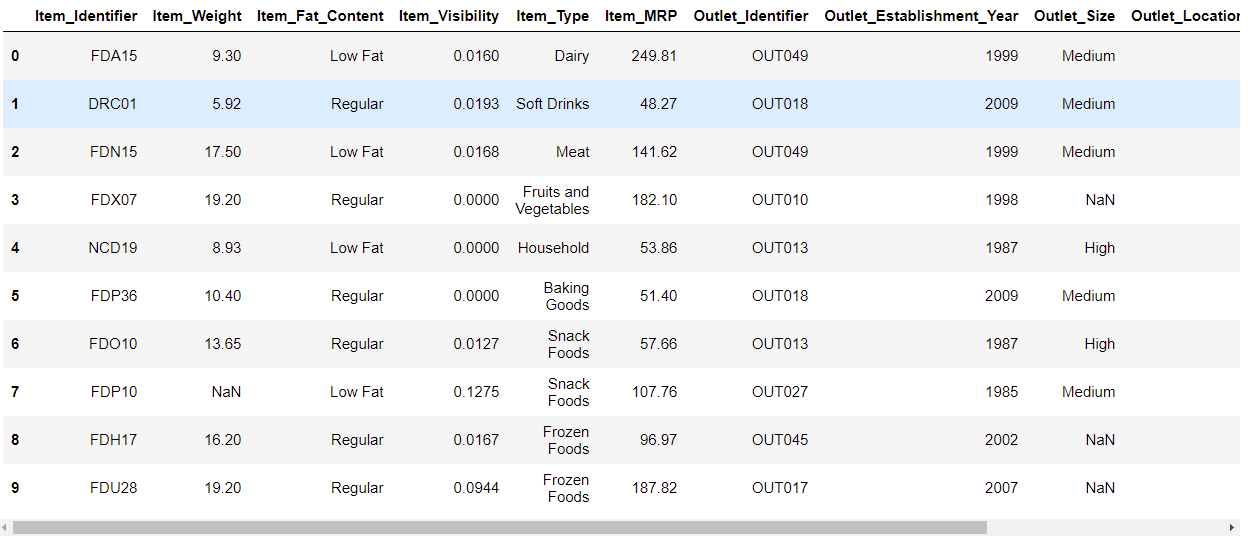

In [ ]:
# get rid of nonessential variables - but why are we removing these variables?

data_df = data_df.drop(???, axis=???)

In [ ]:
# Check for missing values using the bar chart format

msno.???(???, color='darkorange')

In [ ]:
# Produce a complete exploratory data analysis

from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

filename = ""
separator = ""

dft = AV.AutoViz(
    filename,
    sep = separator,
    depVar=???,
    dfte = data_df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="png",
    max_rows_analyzed=???,
    max_cols_analyzed=???,
)

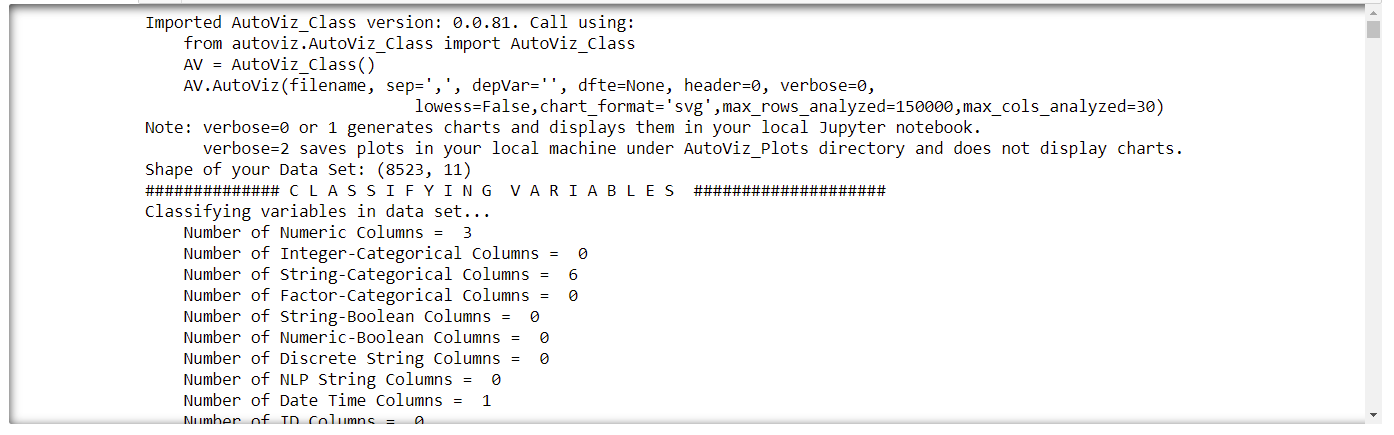

In [ ]:
# isolate predictors separate from the response variable, and we're using all predictors

X = data_df.???(columns=[???])

y = data_df[???]

In [ ]:
# dummy code the predictors; THIS STEP OCCURS BEFORE TRAIN/TEST SPLIT

X = pd.get_dummies(???, drop_first = ???)

In [ ]:
# Check out how many samples and predictors after one-hot encoding

???

In [ ]:
# let's take a look at all of the predictors after dummy coding; what measures do these employ?

pd.DataFrame(???)

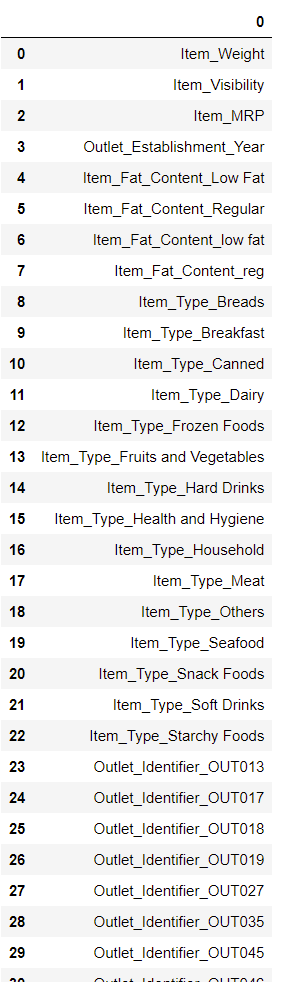

## EXPLANATORY MODEL HERE

In [ ]:
# MISSING VALUE IMPUTATION HERE FOR EXPLANATORY MODEL ONLY

from sklearn.impute import KNNImputer

imputer = KNNImputer(???)

X_imp = imputer.???(X)

X_imp = pd.DataFrame(X_imp, columns = ???)

In [ ]:
algo = LinearRegression()

param_grid = {}

In [ ]:
gridSearch = GridSearchCV(algo, param_grid, cv=???)

gridSearch.fit(???, y)

print('Initial parameters: ', gridSearch.???)

explanatory_model = gridSearch.???

In [ ]:
# print coefficients from the explanatory model
print('intercept ', explanatory_model.???)

print(pd.DataFrame({'Predictor': X.columns, 'coefficient': explanatory_model.???}))

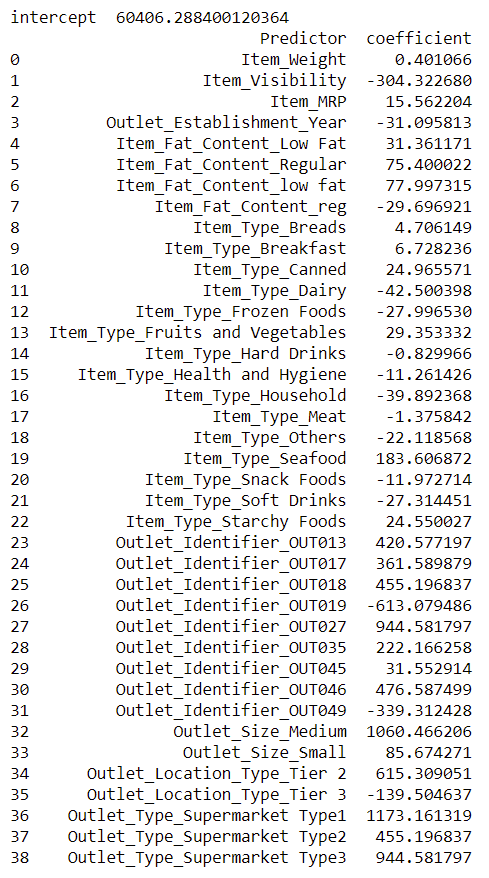

## PREDICTIVE MODEL HERE

In [ ]:
# split into training and holdout (test) datasets

train_X, test_X, train_y, test_y = train_test_split(???, ???, test_size=0.5, random_state=1)

In [ ]:
# MISSING VALUE IMPUTATION HERE (AFTER THE TRAIN/TEST SPLIT)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 6)

train_X = imputer.???(train_X)

test_X = imputer.???(test_X)

### Three methods of regularization
#### 1)  L1 = Least absolute shrinkage and selection operator (Lasso)
#### 2)  L2 = Ridge regression
#### 3)  Bayesian ridge regression is a special form of L2

In [ ]:
# Standardization with Z-score method

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_X = scaler.???(train_X)

test_X = scaler.???(test_X)

train_X = pd.DataFrame(???, columns = ???)

In [ ]:
# LassoCV has hyperparameters that we can adjust - discuss each one.
# normalize = True sets an l2 normalization scheme (this may not be the best method for normalization)
# cv = 10 sets the number of folds of cross validation
# n_alphas = 50 sets the number of regularization values that will be tested
# max_iter = 100 sets the number of iterations that will be tested for convergence (if the model does not converge, increase)
# pre_compute = 'auto' allows the algorithm the option to invoke a precomputed Gram matrix to speed up calculations

lasso_cv = LassoCV(normalize=???, cv=???, n_alphas=???, max_iter=1000, precompute='auto')

lasso_cv.fit(???, ???)

In [ ]:
# DISPLAY MODEL PERFORMANCE

print("LassoCV Model")

regressionSummary(train_y, lasso_cv.???(???))
print()
regressionSummary(test_y, ???.predict(???))

print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print()
print(pd.DataFrame({'Predictor': train_X.columns, 'coefficient': lasso_cv.coef_}))

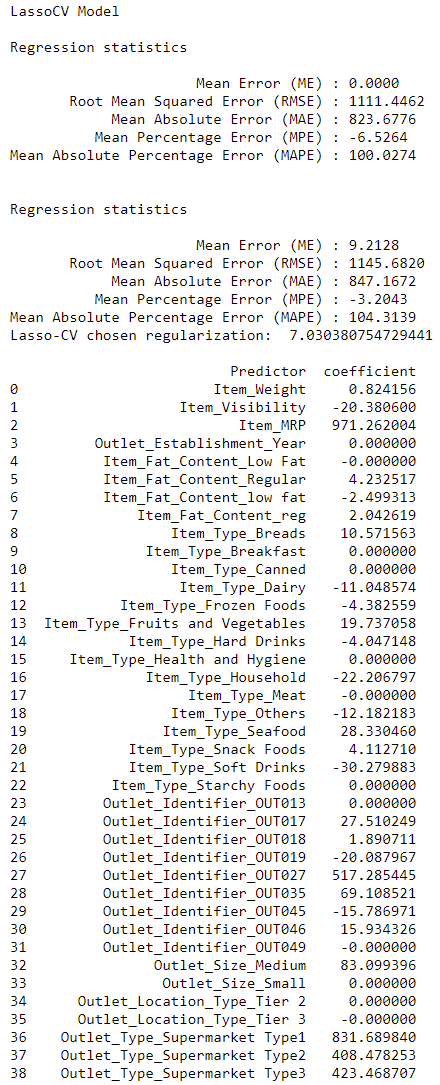

In [ ]:
# Display a histogram of the residuals to determine whether to use RMSE or MAE

%matplotlib inline

data_lm_pred = lasso_cv.predict(test_X)
all_residuals = test_y - data_lm_pred

# Determine the percentage of datapoints with a residual in [-200000, 200000] = approx. 75\%
print(len(all_residuals[(all_residuals > -200000) & (all_residuals < 200000)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=50)

plt.tight_layout()
plt.show()

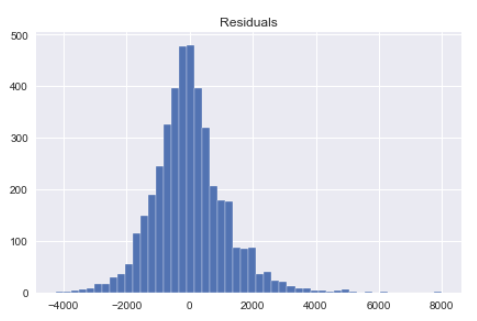

In [ ]:
# CHECK THE DESCRIPTIVE STATISTICS OF THE RESIDUALS

???

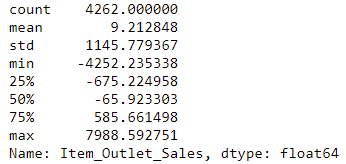

In [ ]:
# Print out the measures of model fit

pred_y = lasso_cv.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, ???, lasso_cv))

print('AIC : ', AIC_score(???, pred_y, ???))

print('BIC : ', BIC_score(???, ???, ???))

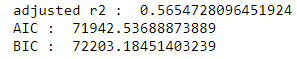

In [ ]:
# Gain and lift charts for inspecting model goodness of fit

pred_v = pd.Series(lasso_cv.predict(???))

pred_v = pred_v.sort_values(ascending=False)

fig,axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(pred_v, ax=axes[0])
ax.set_ylabel('Cumulative Gains')
ax.set_title("Cumulative Gains Chart")

ax = liftChart(pred_v, ax=axes[1], labelBars=False)
ax.set_ylabel("Lift")

plt.tight_layout()
plt.show()

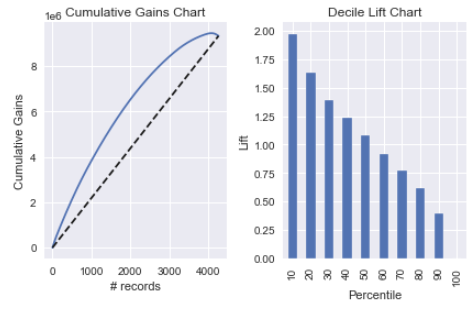

In [ ]:
# RidgeCV has hyperparameters that we can adjust - discuss each one.

ridge_cv = RidgeCV(normalize=False, alphas=(0.01, 0.1, 0.3, 0.5, 0.7, 1.0), cv=???, scoring=???)

ridge_cv.???(???, ???)

In [ ]:
print("RidgeCV Model")

regressionSummary(train_y, ridge_cv.???(???))
print()
regressionSummary(test_y, ???.predict(???))

print('Ridge-CV chosen regularization: ', ridge_cv.alpha_)
print()

In [ ]:
# Print out the measures of model fit

pred_y = ridge_cv.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, ridge_cv))
print('AIC : ', AIC_score(train_y, pred_y, ridge_cv))
print('BIC : ', BIC_score(train_y, pred_y, ridge_cv))

In [ ]:
bayesianRidge = BayesianRidge(normalize=False)

bayesianRidge.fit(train_X, train_y)

In [ ]:
print("Bayesian Ridge Model")

regressionSummary(train_y, bayesianRidge.predict(train_X))
print()
regressionSummary(test_y, bayesianRidge.predict(test_X))

print('Bayesian ridge chosen regularization: ', bayesianRidge.lambda_ / bayesianRidge.alpha_)

In [ ]:
# Print out the measures of model fit

pred_y = ???.predict(???)

print('adjusted r2 : ', adjusted_r2_score(train_y, ???, ???))
print('AIC : ', AIC_score(???, ???, ???))
print('BIC : ', BIC_score(???, ???, ???))

In [ ]:
# ElasticNetCV model that combines LASSO and Ridge regression

elastic_cv = ElasticNetCV(normalize=False, cv=10, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=100)

elastic_cv.???(???, ???)

In [ ]:
print("ElasticNet Model")

regressionSummary(train_y, elastic_cv.predict(train_X))
print()
regressionSummary(test_y, elastic_cv.predict(test_X))

# print coefficients
print('intercept ', elastic_cv.intercept_)
print(pd.DataFrame({'Predictor': train_X.columns, 'coefficient': elastic_cv.coef_}))
print('ElasticNet-CV chosen regularization: ', elastic_cv.alpha_)
print('ElasticNet-CV chosen l1 ratio: ', elastic_cv.l1_ratio_)

In [ ]:
# Print out the measures of model fit

pred_y = elastic_cv.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, elastic_cv))
print('AIC : ', AIC_score(train_y, pred_y, elastic_cv))
print('BIC : ', BIC_score(train_y, pred_y, elastic_cv))